In [23]:
# Librairies
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [24]:
#making test model
# Initialisation
classifier = Sequential()

# La Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# adding conv and maxpooling
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# connected layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# training parameters
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [112]:
#model to predict if plastic is clean or dirty

from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

# defining the VGG16
classifier_vgg16_2 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

#Defining the hidden layers as untrainable
#(we could retrain them or choose to retrain only the first ones for example)
for layer in classifier_vgg16_2.layers:
    layer.trainable = False

#adding layers specific to our classification problem
flat2 = Flatten()(classifier_vgg16_2.output)
classif2 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat2)
output2 = Dense(1, activation='sigmoid')(classif2)

classifier_vgg16_2 = Model(inputs=classifier_vgg16_2.inputs, outputs=output2)

classifier_vgg16_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#training
train_datagen_2 = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen_2 = ImageDataGenerator(rescale = 1./255)

training_set_2 = train_datagen_2.flow_from_directory("C:/Users/catri/OneDrive/Simplon/IA-P2-Euskadi with my Triof project/Projets/Projet P8 - Triof/triof/cleandirty_training",
                                                 target_size = (64, 64),
                                                 batch_size = 30,
                                                 class_mode = 'binary')

test_set_2 = test_datagen_2.flow_from_directory("C:/Users/catri/OneDrive/Simplon/IA-P2-Euskadi with my Triof project/Projets/Projet P8 - Triof/triof/cleandirty_test",
                                            target_size = (64, 64),
                                            batch_size = 30,
                                            class_mode = 'binary')

classifier_vgg16_2.fit(training_set_2,
               steps_per_epoch = 8, #250/30 = 8.33
               epochs = 30,
               validation_data = test_set_2,
               validation_steps=5)

Found 252 images belonging to 2 classes.
Found 92 images belonging to 2 classes.
Epoch 1/30
8/8 [==============================] - 7s 909ms/step - loss: 0.4888 - accuracy: 0.7703 - val_loss: 0.4197 - val_accuracy: 0.8587
Epoch 2/30
8/8 [==============================] - 2s 287ms/step - loss: 0.2863 - accuracy: 0.8649
Epoch 3/30
8/8 [==============================] - 2s 277ms/step - loss: 0.2266 - accuracy: 0.9324
Epoch 4/30
8/8 [==============================] - 2s 257ms/step - loss: 0.1928 - accuracy: 0.9324
Epoch 5/30
8/8 [==============================] - 2s 264ms/step - loss: 0.1683 - accuracy: 0.9459
Epoch 6/30
8/8 [==============================] - 2s 263ms/step - loss: 0.1670 - accuracy: 0.9279
Epoch 7/30
8/8 [==============================] - 2s 285ms/step - loss: 0.1319 - accuracy: 0.9505
Epoch 8/30
8/8 [==============================] - 2s 293ms/step - loss: 0.1217 - accuracy: 0.9667
Epoch 9/30
8/8 [==============================] - 2s 285ms/step - loss: 0.0854 - accuracy: 0.

[[1.]]
Item is dirty


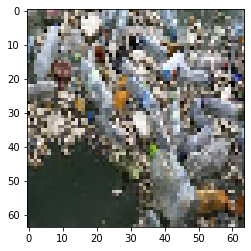

In [121]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

#showing test image
img = image.load_img("C:/Users/catri/OneDrive/Simplon/IA-P2-Euskadi with my Triof project/Projets/Projet P8 - Triof/triof/cleandirty_test/dirty_plastics/0f8ada3d14.jpg",target_size=(64,64))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

#making prediction
output = classifier_vgg16_2.predict(img)
print(output)

#returning prediction
if output <= 0.5:
    print('Item is clean')
else:
    print('Item is dirty')
    


In [122]:
#saving the model
classifier_vgg16_2.save("clean or dirty classifier")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: clean or dirty classifier\assets


In [123]:
#if want to load it use:

#from keras.models import load_model
#classifier = load_model('clean or dirty classifier')